# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 05 : Loss Functions
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_5_aa1234.ipynb* before starting the lab. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

5. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file will not be accepted.

6. Each task has points assigned to it. Total Lab is of 100 points.

7. Use of for loops is strictly prohibited.

8. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

9. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


We will explore different loss functions in this lab. Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

# **Least Squares Loss**





Let's start with importing Libraries first

In [35]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Import math Library
import math

In [36]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    y = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return y

In [37]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 0.1;
  omega_1[0,0] = -2.0; omega_1[0,1] = -1.0; omega_1[0,2] = 7.0

  return beta_0, omega_0, beta_1, omega_1

In [38]:
# Utility function for plotting data
def plot_univariate_regression(x_model, y_model, x_data = None, y_data = None, sigma_model = None, title= None):
  # Make sure model data are 1D arrays
  x_model = np.squeeze(x_model)
  y_model = np.squeeze(y_model)

  fig, ax = plt.subplots()
  ax.plot(x_model,y_model)
  if sigma_model is not None:
    ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')
  ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if title is not None:
    ax.set_title(title)
  if x_data is not None:
    ax.plot(x_data, y_data, 'ko')
  plt.show()

# Univariate regression

We'll investigate a simple univariate regression situation with a single input $x$ and a single output $y$ as pictured in figures 5.4 and 5.5b.

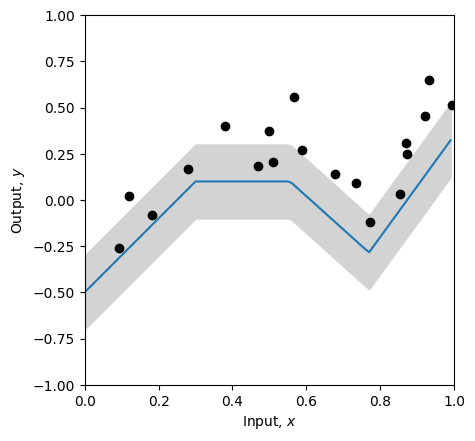

In [39]:
# Let's create some 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.1

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)


# Q1: TODO [8 Points]
Look at the graph given above. Can you figure out what does this grey region represent? What would increasing and decreasing the length of this blue region mean? What do black dots represen and what does blue line represent?


Grey Region: The is a sigma parameter in the plotting function which defines a surrounding region around the model output line. It can be represented as the data is likely to lie in this region.

Blue Line: This is the output of the model that will be used for predictions

Black Dots: These are the actual training data points that the model has to learn from.

# Q2: TODO [4 Points]
Can you draw the image of this neural network given above? Submit the image alongside this notebook and rename this image as Q2_image. You can use any online tool to draw this as well.

# Q3: TODO [12 points]
Code the equation for normal distribution by replacing the code given below. Use of numpy's function of normal distribution for solving thisis not allowed.



<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1Og32YsIdZanGT7UCu6I09IpOtc-r5209)

</center>

In [40]:
# Return probability using the equation in the above image given
def normal_distribution(y, mu, sigma):
  a = 1/(np.sqrt(2*np.pi*(sigma**2)))
  b = np.exp(-(y-mu)**2/(2*sigma**2))
  return a*b

In [41]:
#Do Not Edit
#Use this code for Testing
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))
assert round(normal_distribution(1,-1,2.3),3)==0.119

Correct answer = 0.119, Your answer = 0.119


# Q4: TODO [9 Points]

Answer theoretical questions given below

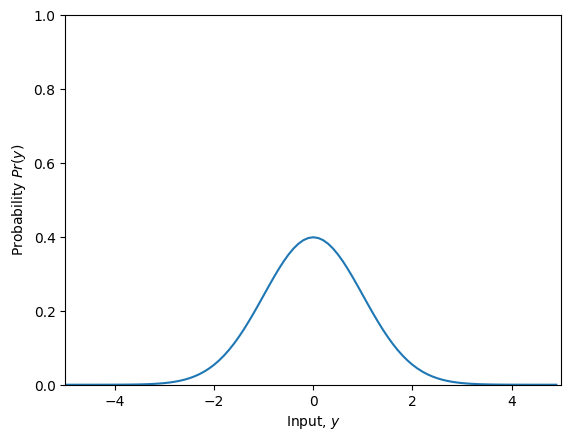

In [42]:
# Let's plot the Gaussian distribution.
y_gauss = np.arange(-5,5,0.1)
mu = 0; sigma = 1
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel(r'Input, $y$'); ax.set_ylabel(r'Probability $Pr(y)$')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

# TODO
# 1. Predict what will happen if we change to mu=1 and leave sigma=1
# Since mu represents the mean of the distribution, the graph's peak point should shift from 0 to 1.


# Now change the code above and see if you were correct.
# Yes, my prediction was correct


# 2. Predict what will happen if we leave mu = 0 and change sigma to 2.0
# The distribution will be more spread out since sigma represents the standard deviation of the distribution


# 3. Predict what will happen if we leave mu = 0 and change sigma to 0.5
# The distribution will be more compressed around the mean point since sigma represents the standard deviation of the distribution

Now let's compute the likelihood using this function

# Q5: TODO [10 Points]

Compute the likelihood of the data -- the product of the normal probabilities for each data point. You will need np.prod() and the normal_distribution function you used above


<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1jN18K4viGQC5S0ki-5Q7qlNccHq5dtkh)

</center>


In [43]:
# Use the equation given in image to answer this part.
def compute_likelihood(y_train, mu, sigma):
  likelihood = np.prod(normal_distribution(y_train, mu, sigma))
  return likelihood

In [44]:
#Do Not Edit
#Use this code for Testing

beta_0, omega_0, beta_1, omega_1 = get_parameters()
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sigma = 0.2
likelihood = compute_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))

assert round(likelihood,9)==0.000010624

Correct answer = 0.000010624, Your answer = 0.000010624


# Q6: TODO [7 Points]
What we have calculated earlier is likelihood. If we increase the number of values in training dataset then what will happen? Try using the empty codespace given below to test it and write the answer of this question after that cell.

In [45]:
# Use this space to test above given task
sigma = 0.2; mu = 0
for data_size in [10,20,40,80]:
    x_train_mod = np.random.normal(mu,sigma,data_size)
    y_train_mod = np.random.normal(mu,sigma,data_size)
    mu_pred = shallow_nn(x_train_mod, beta_0, omega_0, beta_1, omega_1)
    likelihood = compute_likelihood(y_train_mod, mu_pred, sigma)
    print(f"Dataset Size = {data_size}\nLikelihood = {likelihood}")

Dataset Size = 10
Likelihood = 2.019676274372028e-12
Dataset Size = 20
Likelihood = 1.0014864355680038e-31
Dataset Size = 40
Likelihood = 1.2899518602844848e-92
Dataset Size = 80
Likelihood = 9.312088605656339e-144


The more number of data points we add, the more the likehood starts to approach 0.

# Q7: Task [10 Points]

You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well.  This is because it is the product of several probabilities, which are all quite small themselves.
This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math.

This is why we use negative log likelihood.
Compute the negative log likelihood of the data without using a product. You will need np.sum(), np.log().

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1Wry_AA7a-1e48vrxEaovoTXKMek9E7Dq)

</center>

In [46]:
# Use the equation given in image to answer this part.
def compute_negative_log_likelihood(y_train, mu, sigma):
  nll = -np.sum(np.log(normal_distribution(y_train, mu, sigma)))
  return nll

In [47]:
#Do Not Edit
#Use this code for Testing
beta_0, omega_0, beta_1, omega_1 = get_parameters()
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sigma = 0.2
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))

assert round(nll,9)==11.452419564

Correct answer = 11.452419564, Your answer = 11.452419564


You have already calculated sum of squares in Lab 3. We will use this as well. Code for this is given below.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1PHXjLmFcQl3JyJPb3MvD8e_uEB_gccCc)

</center>


In [48]:
def compute_sum_of_squares(y_train, y_pred):
  sum_of_squares = np.sum((y_train-y_pred)**2)
  return sum_of_squares

Now let's investigate finding the maximum likelihood / minimum negative log likelihood / least squares solution.  For simplicity, we'll assume that all the parameters are correct except one and look at how the likelihood, negative log likelihood, and sum of squares change as we manipulate the last parameter.  We'll start with overall y offset, beta_1 (formerly phi_0)

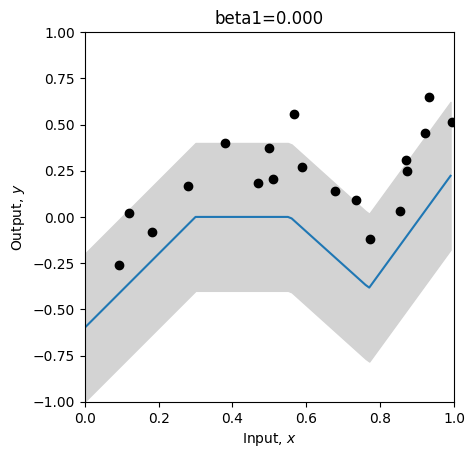

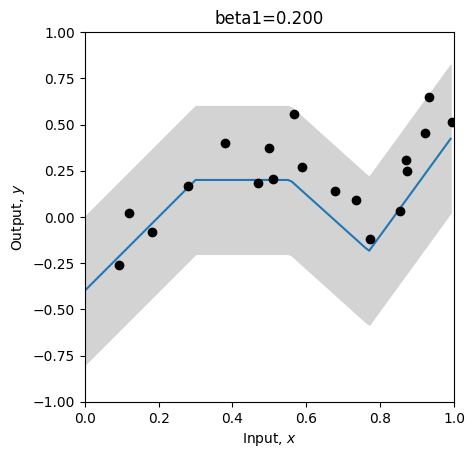

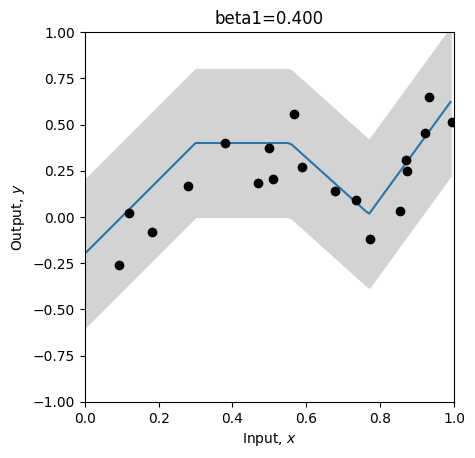

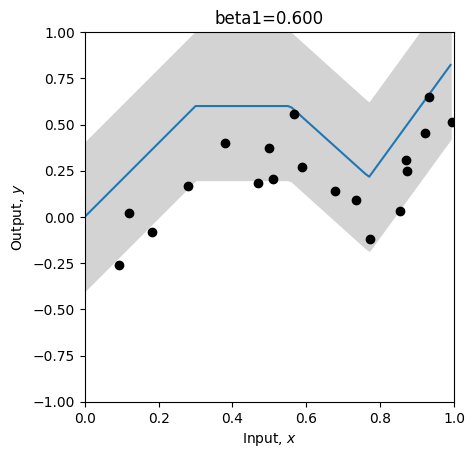

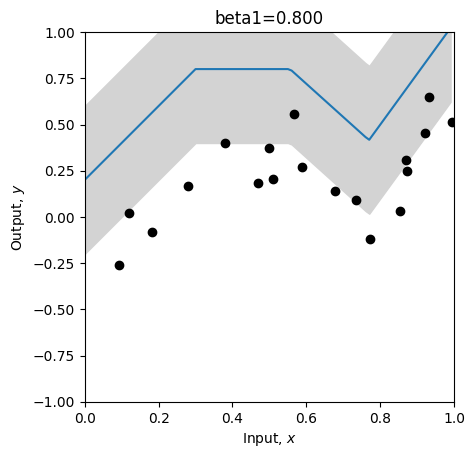

In [49]:
# Define a range of values for the parameter
beta_1_vals = np.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)
sum_squares = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))


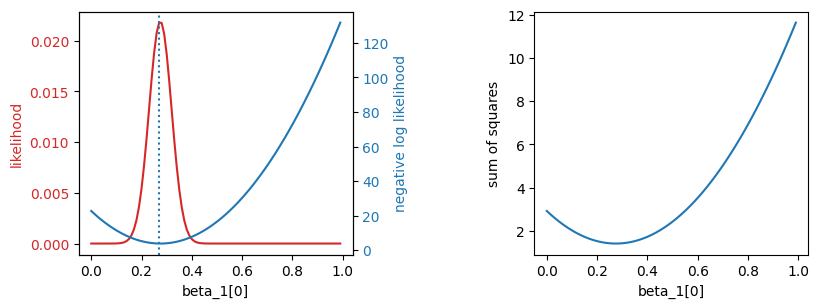

In [50]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the offset beta1
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('beta_1[0]')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(beta_1_vals, sum_squares); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


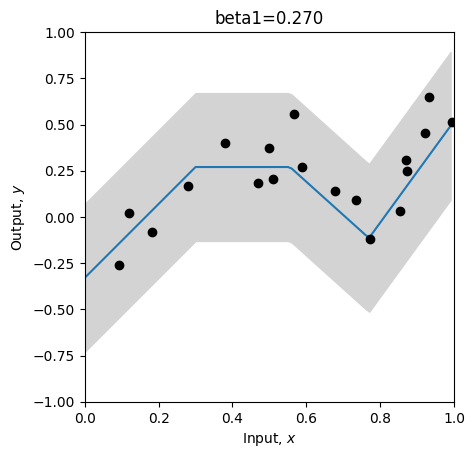

In [51]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# and the least squares solutions
# Let's check that:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[np.argmin(sum_squares)],beta_1_vals[np.argmin(sum_squares)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(sum_squares)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

# Q8: TODO [5 Points]
What did you learn about likelihood, negative log likelihood and sum of squares based on previous graphs? Write your asnwer in text space given below?

The maximum likelihood, the minimum negative-log-likelihood and the minimum sum-of-square all occur at the same value of the best parametere for the model.

They all give the same answer. But you can see from the three plots above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood or the least squares.<br>

Let's do the same thing with the standard deviation parameter of our network.  This is not an output of the network (unless we choose to make that the case), but it still affects the likelihood.



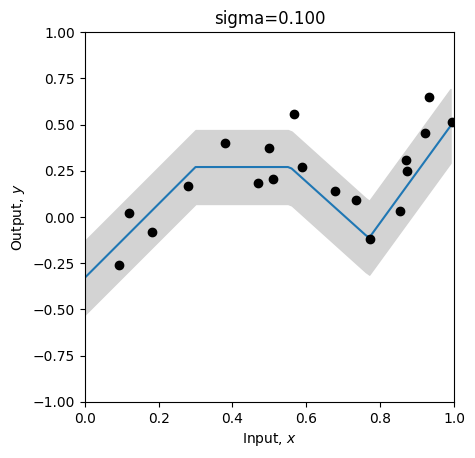

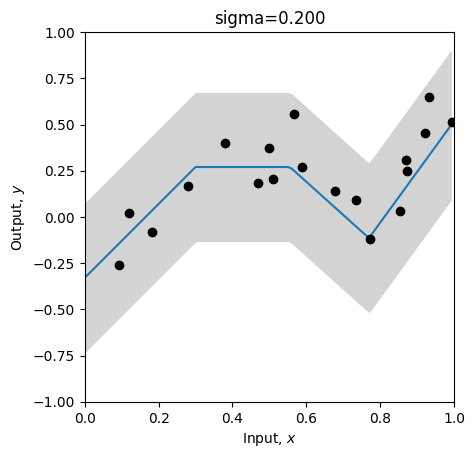

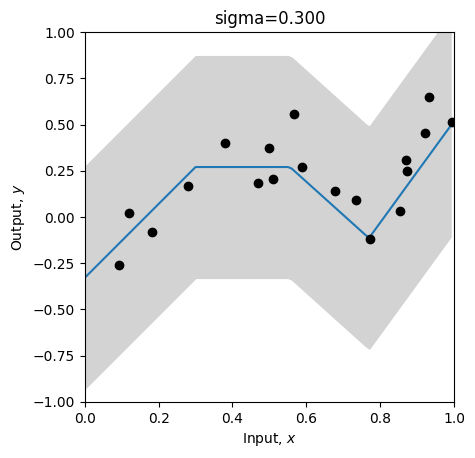

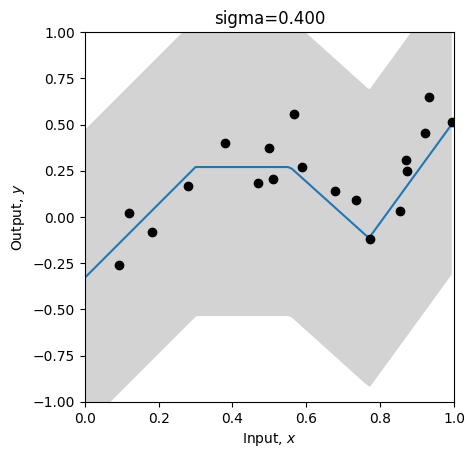

In [52]:
# Define a range of values for the parameter
sigma_vals = np.arange(0.1,0.5,0.005)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(sigma_vals)
nlls = np.zeros_like(sigma_vals)
sum_squares = np.zeros_like(sigma_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Might as well set to the best offset
beta_1[0,0] = 0.27
for count in range(len(sigma_vals)):
  # Set the value for the parameter
  sigma = sigma_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))

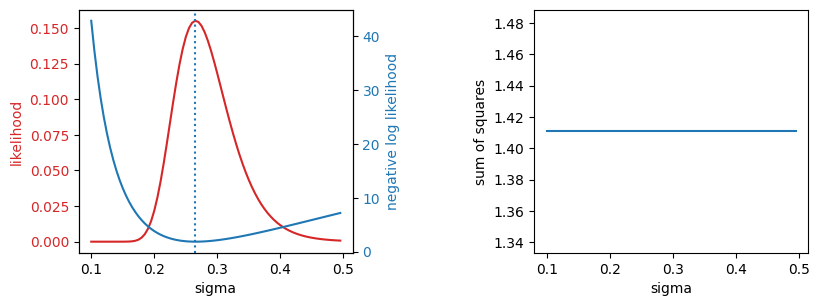

In [53]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the standard deviation sigma
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


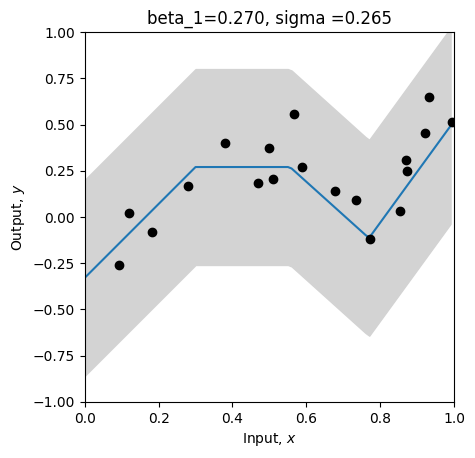

In [54]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# The least squares solution does not depend on sigma, so it's just flat -- no use here.
# Let's check that:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))
# Plot the best model
sigma= sigma_vals[np.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))

Obviously, to fit the full neural model we would vary all of the 10 parameters of the network in $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ (and maybe $\sigma$) until we find the combination that have the maximum likelihood / minimum negative log likelihood / least squares.<br><br>

Here we just varied one at a time as it is easier to see what is going on.  This is known as **coordinate descent**.


# Q9: TODO [5 Points]

Why is the graph of sum of squares flat? Write your answer in the text space given below.

The least sum of squares doesn't depend on sigma hence the plot get's returned as a flat line since it's value doesn't change.

# **Binary Cross-Entropy Loss**
We will now look at the binary cross-entropy loss.  



In [55]:
# Utility function for plotting data
def plot_binary_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Make sure model data are 1D arrays
  x_model = np.squeeze(x_model)
  out_model = np.squeeze(out_model)
  lambda_model = np.squeeze(lambda_model)

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model)
  ax[0].set_xlabel(r'Input, $x$'); ax[0].set_ylabel(r'Model output')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model)
  ax[1].set_xlabel(r'Input, $x$'); ax[1].set_ylabel(r'$\lambda$ or Pr(y=1|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.05,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    ax[1].plot(x_data, y_data, 'ko')
  plt.show()

# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.6;
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0

  return beta_0, omega_0, beta_1, omega_1

# Q10: TODO [10 Points]
#Binary classification

In binary classification tasks, the network predicts the probability of the output belonging to class 1.  Since probabilities must lie in [0,1] and the network can output arbitrary values, we map the network through a sigmoid function that ensures the range is valid. Use of numpy's sigmoid function to solve this question is not allowed.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1KHTE0I3KrxXs-bZa9XAmCv7XL-wnoXMQ)

</center>

In [56]:
# Use the equation given in image to answer this part.
def sigmoid(model_out):
  sig_model_out = 1/(1+np.exp(-model_out))
  return sig_model_out

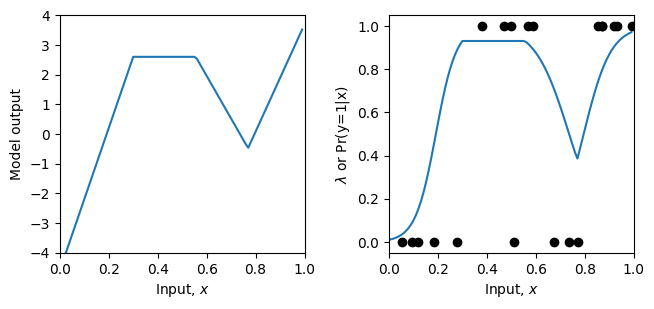

In [57]:
#Do Not Edit
#Use this code for Testing
#If your code for sigmoid is correct, this cell will generate graphs same as the ones given below

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([0,1,1,0,0,1,\
                    1,0,0,1,0,1,\
                    0,1,1,0,1,0, \
                    1,1])
beta_0, omega_0, beta_1, omega_1 = get_parameters()
x_model = np.arange(0,1,0.01)
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1JqWv6skOI_BbQJlTqJv4_NyCr1XJwTbV)

</center>

The left is model output and the right is the model output after the sigmoid has been applied, so it now lies in the range [0,1] and represents the probability, that y=1.  The black dots show the training data.  We'll compute the likelihood and the negative log likelihood.

# Bernouli Disribution
We looked at Normal Dsitribution earlier. We will now try using Bernouli Dstribution to perform the same task.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1dMDtYZ3t346p-0M7EhOn3HMUvMfA0SVf)

</center>


In [58]:
def bernoulli_distribution(y, lambda_param):
  prob = (1-lambda_param)**(1-y)*(lambda_param**y)
  return prob

# Q11: Task [10 Points]
Compute the likelihood of the data -- the product of the Bernoulli probabilities for each data point.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1TrdfbZWWFupzBTQPnqc3Gv14RMpSQ6Vt)

</center>



In [59]:
# Use the equation given in image to answer this part.
def compute_likelihood(y_train, lambda_param):
  likelihood = np.prod(bernoulli_distribution(y_train, lambda_param))
  return likelihood

In [60]:
#Do Not Edit
#Use this code for Testing

beta_0, omega_0, beta_1, omega_1 = get_parameters()
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
likelihood = compute_likelihood(y_train, lambda_train)
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000070237,likelihood))

assert round(likelihood,9)==0.000070237

Correct answer = 0.000070237, Your answer = 0.000070237


# Q12: Task [10 Points]

You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well.  This is because it is the product of several probabilities, which are all quite small themselves.
This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math

This is why we use negative log likelihood.

Compute the likelihood of the data -- don't use the likelihood function above -- compute the negative sum of the log probabilities.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1OETVjnsMZLNHVtskDy8sA37L4e3x3PkD)

</center>

In [61]:
# Use the equation given in image to answer this part.
def compute_negative_log_likelihood(y_train, lambda_param):
  nll = -np.sum(np.log(bernoulli_distribution(y_train, lambda_param)))
  return nll

In [62]:
#Do Not Edit
#Use this code for Testing

beta_0, omega_0, beta_1, omega_1 = get_parameters()
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
nll = compute_negative_log_likelihood(y_train, lambda_train)
print("Correct answer = %9.9f, Your answer = %9.9f"%(9.563639387,nll))

assert round(nll,9)==9.563639387

Correct answer = 9.563639387, Your answer = 9.563639387


Now let's investigate finding the maximum likelihood / minimum negative log likelihood solution.  For simplicity, we'll assume that all the parameters are fixed except one and look at how the likelihood and negative log likelihood change as we manipulate the last parameter.  We'll start with overall y_offset, beta_1 (formerly phi_0)

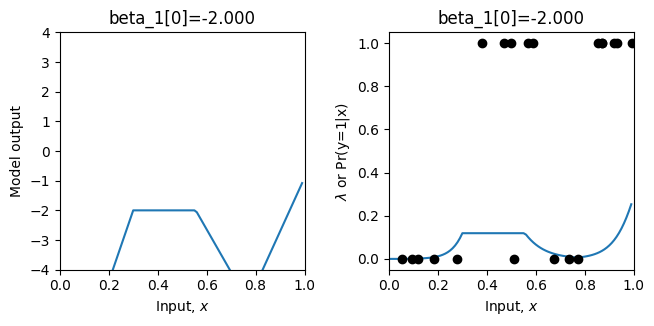

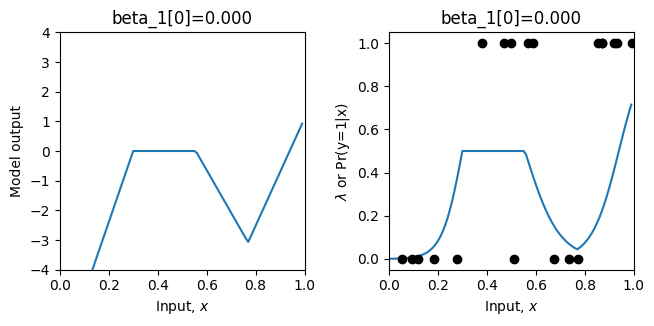

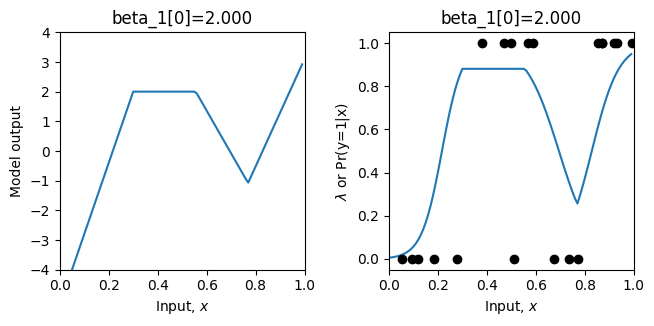

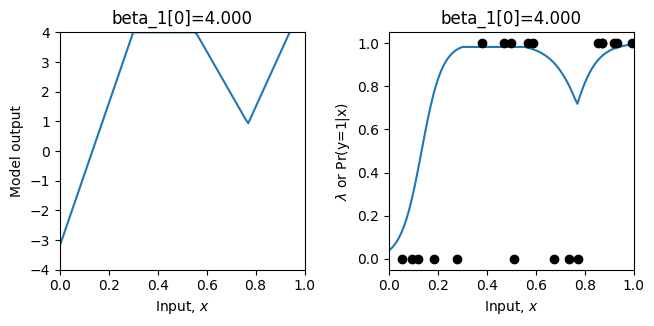

In [63]:
# Define a range of values for the parameter
beta_1_vals = np.arange(-2,6.0,0.1)
# Create some arrays to store the likelihoods, negative log likelihoods
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = sigmoid(model_out)
  # Compute and store the two values
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = sigmoid(model_out)
    plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))


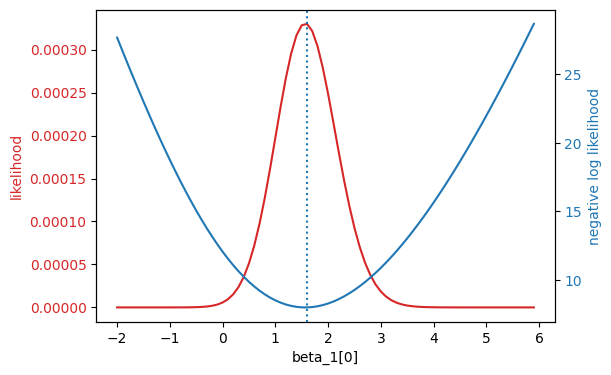

In [64]:
# Now let's plot the likelihood and negative log likelihood as a function of the value of the offset beta1
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()

Maximum likelihood = 0.000330, at beta_1=1.600
Minimum negative log likelihood = 8.016513, at beta_1=1.600


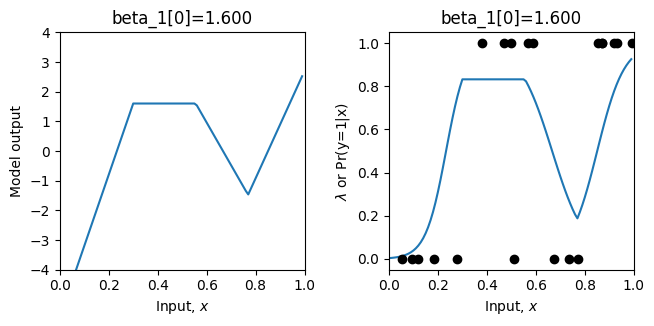

In [65]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# Let's check that:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))


They both give the same answer. But you can see from the likelihood above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood.<br><br>

Again, to fit the full neural model we would vary all of the 10 parameters of the network in the $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ until we find the combination that have the maximum likelihood / minimum negative log likelihood.<br><br>

